In [136]:
import numpy as np
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt

In [137]:
def month_wts(nyears):
    days_pm  = [31,28,31,30,31,30,31,31,30,31,30,31]
    return xr.DataArray(np.tile(days_pm,nyears),dims='time')

### read in the sparsegrid info

In [5]:
thedir  = '/glade/u/home/forrest/ppe_representativeness/output_v4/'
thefile = 'clusters.clm51_PPEn02ctsm51d021_2deg_GSWP3V1_leafbiomassesai_PPE3_hist.annual+sd.400.nc'
ds = xr.open_dataset(thedir+thefile)

### map of the clusters

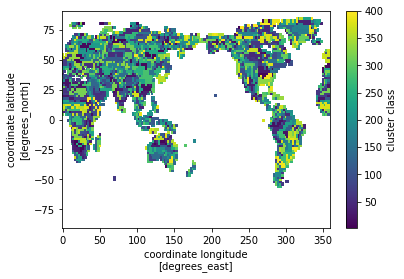

In [8]:
ds.cclass.plot()

### read in an example output file

In [21]:
thedir = '/glade/scratch/djk2120/clm5ppe/ens002/histSTEP3/'
thefile = glob.glob(thedir+'*.h0.*')[0]
ds2 = xr.open_dataset(thefile)
lats = ds2.grid1d_lat.values
lons = ds2.grid1d_lon.values

### plot up centroids from the output and from the sparsegrid

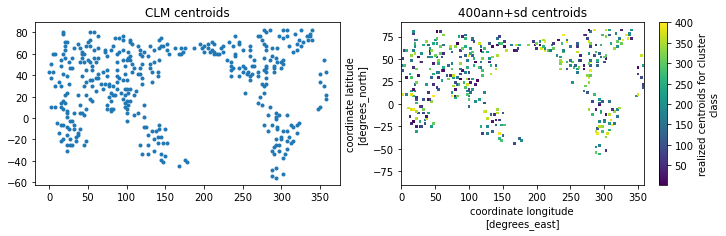

In [142]:
plt.figure(figsize=[12,3])
plt.subplot(121)
plt.plot(lons,lats,'.')
plt.title('CLM centroids')
plt.subplot(122)
ds.rcent.plot()
plt.title('400ann+sd centroids');

### the main thing
 - iterate through the CLM gridcells
 - retrieve the total represented landarea from Forrest

In [95]:
landarea = (ds.area*ds.landfrac).values
area  = np.zeros(400)
for i in range(400): 
    lat = lats[i]
    lon = lons[i]
    ixlat = abs(ds.lat-lat)<0.1
    ixlon = abs(ds.lon-lon)<0.1
    clust = ds.cclass[ixlat,ixlon].values
    ixc   = ds.cclass==clust
    area[i] = landarea[ixc].sum()
la = xr.DataArray(area,dims='gridcell',name='landarea')
la.attrs={'long_name':'total area of represented gridcells',
          'units':'km2'}

### write to netcdf

In [131]:
la.to_netcdf('sparsegrid_landarea.nc')

### check the value from the default params production run

In [116]:
thedir = '/glade/scratch/djk2120/ctsm51c6_PPEn08ctsm51d023_2deg_GSWP3V1_Sparse400_2000/run/'
thefile = glob.glob(thedir+'*.h0.*')[0]
base = xr.open_dataset(thefile)
nmonths = len(base.time)
yr0 = base['time.year'][0].values
base['time'] =xr.cftime_range(str(yr0),periods=nmonths,freq='MS')

In [145]:
gpp_mth_grid = 1e-9*24*60*60*month_wts(10)*la*base.GPP  #PgC/representd-gcell/mth
gpp_ann      = gpp_mth_grid.sum(dim='gridcell').groupby('time.year').sum()

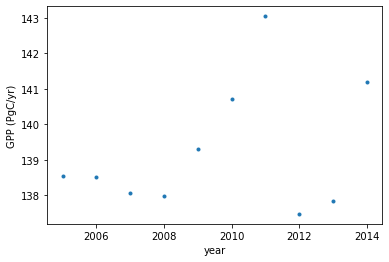

In [148]:
gpp_ann.plot.line('.')
plt.ylabel('GPP (PgC/yr)');

In [149]:
gpp_ann.mean()

<xarray.DataArray ()>
array(139.26398402)